In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing data set

In [2]:
df = pd.read_excel('Airline Dataset1.xlsx')
df.head()

,SL. No.,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
0,1,0,77.2,39,69,0,0,3,1,5,4,11854.27
1,2,0,45.3,34,10,4,1,11,1,2,4,14968.50
2,3,0,70.9,36,17,1,2,7,1,1,4,5859.32
3,4,0,35.1,31,28,1,4,9,1,7,4,2774.19
4,5,0,41.8,33,17,4,6,28,1,7,4,3833.66


In [3]:
#CHANGING TIME TO 24H FORMAT
df['time']=df['time']-24

In [4]:
df.pop('SL. No.')
df.head()

,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
0,0,77.2,15,69,0,0,3,1,5,4,11854.27
1,0,45.3,10,10,4,1,11,1,2,4,14968.50
2,0,70.9,12,17,1,2,7,1,1,4,5859.32
3,0,35.1,7,28,1,4,9,1,7,4,2774.19
4,0,41.8,9,17,4,6,28,1,7,4,3833.66


In [5]:
x=df.columns
for a in x:
    print(df[a].dtypes)

int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
float64


In [6]:
df['from_ind'] = df.from_ind.astype(object)
df['Class'] = df.Class.astype(object)
df['weekday'] = df.weekday.astype(object)
df['month'] = df.month.astype(object)
df['demand'] = df.demand.astype(object)
df['to_ind'] = df.to_ind.astype(object)
x=df.columns
for a in x:
    print(df[a].dtypes)

object
float64
int64
int64
object
object
int64
object
object
object
float64


In [21]:
df.describe()

,Age,time,adv_bookdays,monthday,Fare
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,48.478436,13.325465,23.414283,15.372474,8525.626751
std,18.635317,5.992250,15.141569,8.862410,6521.815943
min,12.800000,0.000000,0.000000,1.000000,1132.820000
25%,33.900000,9.000000,12.000000,8.000000,4359.290000
50%,48.100000,14.000000,21.000000,15.000000,6626.410000
75%,64.100000,18.000000,33.000000,23.000000,10546.235000
max,83.700000,24.000000,95.000000,31.000000,84141.470000


<function matplotlib.pyplot.show(*args, **kw)>

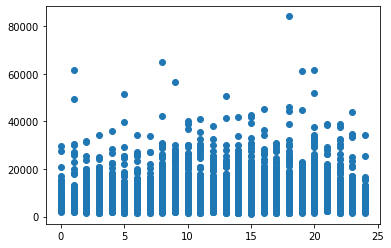

In [24]:
plt.scatter(df['time'],df['Fare'],label='time-fare plot')
plt.show

NO CORRELEARION EXISTS BETWEEN FAIR AND TIME OF BOOKING

<function matplotlib.pyplot.show(*args, **kw)>

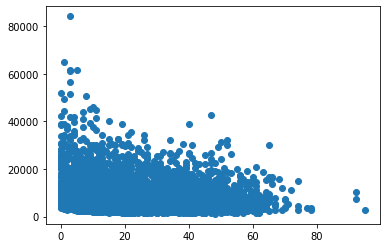

In [25]:
plt.scatter(df['adv_bookdays'],df['Fare'],label='adv_bookdays-fare plot')
plt.show

NO CORRELEARION EXISTS BETWEEN FAIR AND ADVVANCE BOOKING DAYS

SINCE OTHER FEATURES ARE OF OBJECT TYPES THERE IS NO POINT TO CHECKING FOR CORRELATION 

HENCE I AM NOT USING LINEAR REGRESSION TO BUILD MODEL

In [7]:
x=df.iloc[:,0:10]
y=df.iloc[:,10]

# Splitting dataset and model building

I TREID USING PCA TO GENERATE NEW FEATURE SET FOR TRAING THE MODEL BUT THE ACCURACY WS WAY LESS THAN USING GIVEN DATASET AS DATA FOR TRAINING THE MODEL.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [9]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()

In [10]:
y_pred=DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
Y=reg.predict(X_test)

# Error evaluation

In [12]:
import sklearn
rmse=np.sqrt(sklearn.metrics.mean_squared_error(y_test, Y))


# Training model using whole dataset

In [13]:
x=df.iloc[:,0:10]
y=df.iloc[:,10]

In [14]:
reg= DecisionTreeRegressor()
y_pred=DecisionTreeRegressor(random_state=0)
reg.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

# Test dataset file run

In [15]:
test=pd.read_excel('Airline Dataset1.xlsx',sheet_name=1)


In [16]:
test.head()

,SL. No.,Class,Age,time,adv_bookdays,weekday,month,monthday,demand,from_ind,to_ind,Fare
0,6235,0,44.6,34,5,5,2,11,1,7,2,NaN
1,6236,0,70.2,39,17,3,7,10,1,6,2,NaN
2,6237,0,42.1,31,54,4,8,1,1,7,2,NaN
3,6238,0,47.5,36,32,3,4,11,1,1,2,NaN
4,6239,0,40.1,30,16,3,3,13,1,1,2,NaN


In [17]:
test['time']=test['time']-24

In [18]:
test.pop('SL. No.')
test.pop('Fare')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
996    NaN
997    NaN
998    NaN
999    NaN
1000   NaN
Name: Fare, Length: 1001, dtype: float64

In [19]:
test['from_ind'] = test.from_ind.astype(object)
test['Class'] =test.Class.astype(object)
test['weekday'] = test.weekday.astype(object)
test['month'] = test.month.astype(object)
test['demand'] = test.demand.astype(object)
test['to_ind'] = test.to_ind.astype(object)

In [20]:
y_predict=reg.predict(test)
y_predict = pd.Series(y_predict)
y_predict.describe()

count     1001.000000
mean      8709.380969
std       7175.481615
min       1373.480000
25%       4125.410000
50%       6531.300000
75%      11245.590000
max      61018.110000
dtype: float64